In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

: 

In [2]:
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


In [4]:
missing_data = data.isnull().sum()
print(missing_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# percentage of missing data 
missing_data_prct = (missing_data.sum()/data.shape[0])*100
print(missing_data_prct)

0.0


In [6]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

<AxesSubplot:xlabel='Outcome', ylabel='count'>

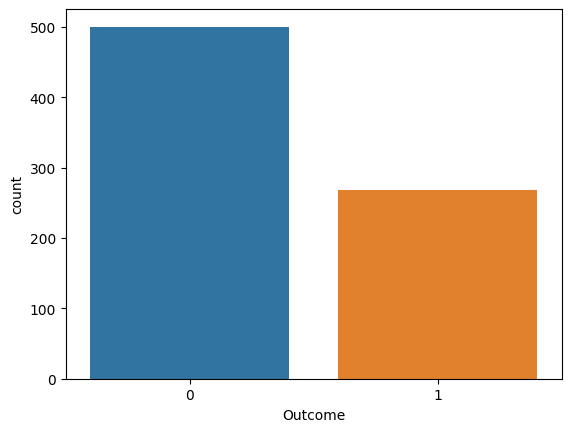

In [7]:
import seaborn as sns
sns.countplot(x="Outcome", data = data)

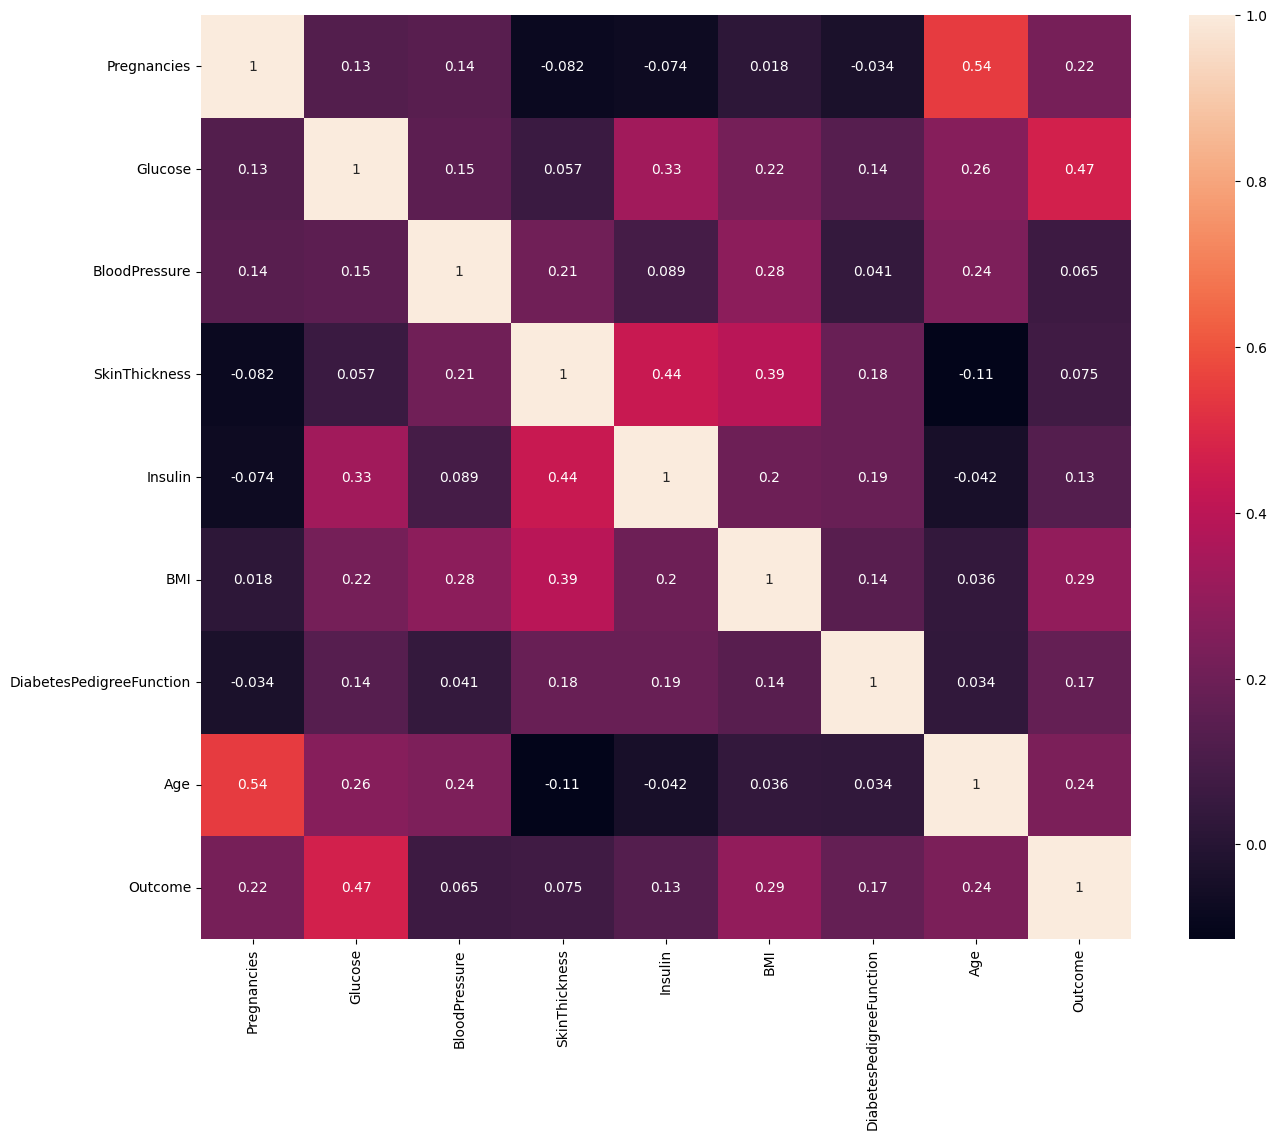

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [9]:
print(data.shape)

(768, 9)


In [10]:
X = data.iloc[:, 0:8]
y = data.iloc[:,8]

In [11]:
#print(y)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for LR: 
[[109  14]
 [ 29  40]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [16]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100
print(val1)
from sklearn import metrics
LR_sensitivity = ((TP / float(FN + TP)))* 100

print(LR_sensitivity)
LR_specificity = ((TN / (TN + FP))) * 100

print(LR_specificity)

0.359375
77.60416666666666
73.15436241610739
32.55813953488372


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for RF: 
[[108  15]
 [ 23  46]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       123
           1       0.75      0.67      0.71        69

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [18]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *100
print(val2)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.359375
80.20833333333334
70.12987012987013
39.473684210526315


# DecisionTreeClassifier

In [19]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for DT: 
[[98 25]
 [33 36]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       123
           1       0.59      0.52      0.55        69

    accuracy                           0.70       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.69      0.70      0.69       192



In [20]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 100
print(val3)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.359375
69.79166666666666
73.13432835820896
43.103448275862064


# KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for KNN: 
[[108  15]
 [ 25  44]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [22]:
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) * 100
print(val4)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

0.359375
79.16666666666666
73.13432835820896
43.103448275862064


# Support Vector Machine

In [23]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_scaled, y_train)
predictions = SVM.predict(X_test_scaled)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for SVM: 
[[112  11]
 [ 28  41]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       123
           1       0.79      0.59      0.68        69

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.80      0.79       192



In [24]:
confusion = confusion_matrix(y_test, predictions)

TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

val5 = accuracy_score(y_test, predictions) * 100
print(val5)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP))) * 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

0.359375
79.6875
73.20261437908496
28.205128205128204


In [32]:
from sklearn.ensemble import VotingClassifier
logistic_regression = LogisticRegression()
svm_classifier = SVC(probability=True)
voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('svm', svm_classifier)
], voting='soft')
voting_classifier.fit(X_train_scaled, y_train)
predictions = voting_classifier.predict(X_test_scaled)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[109  14]
 [ 28  41]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.75      0.59      0.66        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.77       192



# Model Comparsion Accuracy, Sensitivity & Specificity

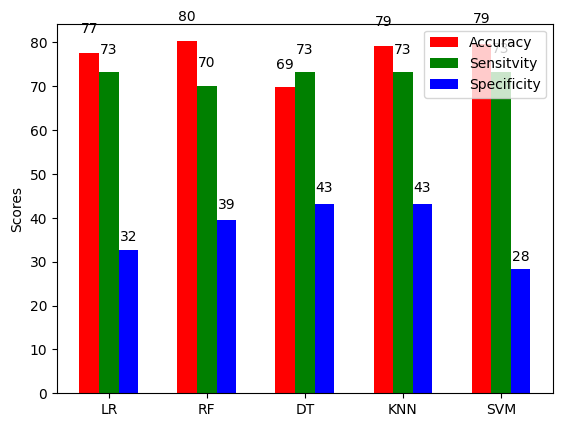

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [LR_sensitivity,RF_sensitivity,DT_sensitivity,KNN_sensitivity,SVM_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [LR_specificity,RF_specificity,DT_specificity,KNN_specificity,SVM_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('LR','RF','DT','KNN','SVM') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Accuracy Comparsion

In [26]:
score = [val1,val2,val3,val4,val5]

In [27]:
#make variabel for save the result and to show it
classifier = ('Logistic Regression','Random Forest','Decision Tree','K-Nearest Neighbor','Suport Vector Machine')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[77.60416666666666, 80.20833333333334, 69.79166666666666, 79.16666666666666, 79.6875]


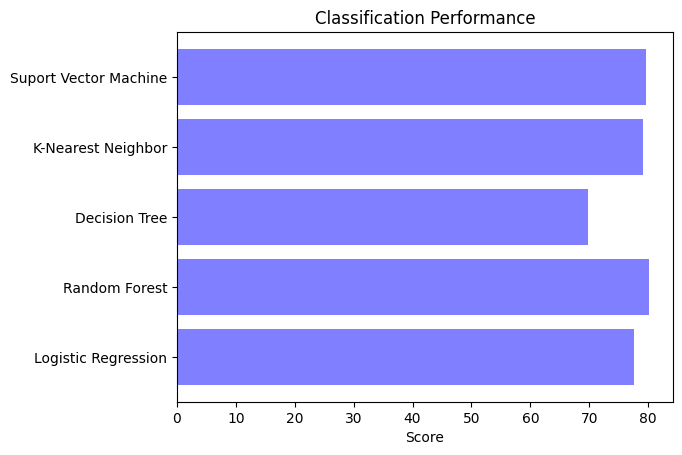

In [28]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [29]:
filename = 'models/randomforest_model.sav'
joblib.dump(RF, filename)

['models/randomforest_model.sav']

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base classifiers
logistic_regression = LogisticRegression()
svm_classifier = SVC(probability=True)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('svm', svm_classifier),
    ('rf', random_forest)
], voting='soft')

# Fit the Voting Classifier
voting_classifier.fit(X_train_scaled, y_train)

# Make predictions
predictions = voting_classifier.predict(X_test_scaled)

# Evaluate the model
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))